In [1]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
# def gen_labels(im_name, pat1, pat2):
#     if pat1 in im_name:
#         label = np.array([0])
#     elif pat2 in im_name:
#         label = np.array([1])
#     return label

In [2]:
def gen_labels(im_name, pat1, pat2):
    '''
    Parameters
    ----------
    im_name : Str
        The image file name.
    pat1 : Str
        A string pattern in the filename for 1st class, e.g "Mel"
    pat2 : Str
        A string pattern in the filename 2nd class, e.g, "Nev"
    Returns
    -------
    Label : Numpy array        
        Class label of the filename name based on its pattern.
    '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label


def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
        Path to the data directory
    train_list : List
        A list containing the name of the images.
    img_h : Int
        image height to be resized to.
    img_w : Int
        image width to be resized to.    
    Returns
    -------
    img_labels : Nested List
        A nested list containing the loaded images along with their
        correcponding labels.
    """
    img_labels = []      
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])
       
        if item[0] % 100 == 0:
             print('Reading: {0}/{1}  of train images'.format(item[0], len(data_list)))
             
    shuffle(img_labels)
    return img_labels


def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
        nested list of image arrays with corresponding class labels.
    img_h : Int
        Image height.
    img_w : Int
        Image width.
    Returns
    -------
    img_arrays : Numpy array
        4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
        1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays


def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
   
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
   
    train_img, train_label =  get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)      
    return train_img, test_img, train_label, test_label

In [3]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(
     train_data_path, test_data_path,
     train_list, test_list, img_h, img_w)

Reading: 0/1000  of train images
Reading: 100/1000  of train images
Reading: 200/1000  of train images
Reading: 300/1000  of train images
Reading: 400/1000  of train images
Reading: 500/1000  of train images
Reading: 600/1000  of train images
Reading: 700/1000  of train images
Reading: 800/1000  of train images
Reading: 900/1000  of train images
Reading: 0/200  of train images
Reading: 100/200  of train images


In [4]:
x_train.shape
#import matplotlib.pyplot as plt
#plt.imshow(train_img)

(1000, 128, 128, 1)

# TASK6A 

In [5]:
from tensorflow.keras.layers import Input, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

In [ ]:
def model(img_ch, img_width, img_height, n_base):
 
     model = Sequential()
 
     model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                 kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Flatten())
     model.add(Dense(128))
     model.add(Activation('relu'))
     model.add(Dense(64))
     model.add(Activation('relu'))
 
     model.add(Dense(1))
     model.add(Activation('sigmoid'))
     model.summary() 
     return model


In [ ]:
# def model(img_width, img_height, img_ch, base):
#         """
#         Functional API model.
#         name the last layer as "out"; e.g., out = ....
#         """        
#         input_size = (img_width, img_height, img_ch)
#         inputs_layer = Input(shape=input_size, name='input_layer')
#         inputs_layer1 = inputs_layer
# #         inputs_layer1 = Flatten()(inputs_layer)  For CNN no need to Flatten?
#         conv1 = Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
#                  kernel_size=(3,3), strides=(1,1), padding='same')(inputs_layer1)
#         acti1 = Activation('relu')(conv1)
#         pool1 = MaxPooling2D(pool_size=(2,2))(acti1)
        
#         conv2 = Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same')(pool1)
#         acti2 = Activation('relu')(conv2)
#         pool2 = MaxPooling2D(pool_size=(2, 2))(acti2)
        
#         conv3 = Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same')(pool2)
#         acti3 = Activation('relu')(conv3)
#         conv4 = Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same')(acti3)
#         acti4 = Activation('relu')(conv4)
#         conv5 = Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same')(acti4)
#         acti5 = Activation('relu')(conv5)
#         pool3 = MaxPooling2D(pool_size=(2, 2))(acti5)
# #         Dense layer only can handle 1D data?
#         inputs_dense = Flatten()(pool3)
#         hidden4 = Dense(128)(inputs_dense)
#         acti6 = Activation('relu')(hidden4)
#         hidden5 = Dense(64)(acti6)
#         acti7 = Activation('relu')(hidden5)
#         out = Dense(1, activation='sigmoid')(acti7)
#         clf = Model(inputs=inputs_layer, outputs=out)
#         clf.summary()
#         return clf

In [ ]:
firstlayer = 32
batchsize = 8
n_epochs = 50   # 20
learningrate = 0.0001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])

In [ ]:
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

# TASK6B

In [ ]:
firstlayer = 16
batchsize = 8
n_epochs = 50   # 20
learningrate = 0.0001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))

n_base = 16

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

In [ ]:
firstlayer = 8
batchsize = 8
n_epochs = 50   # 20
learningrate = 0.0001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))

n_base = 8 without dropout

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

In [ ]:
from tensorflow.keras.layers import Dropout 

In [ ]:
def model(img_ch, img_width, img_height, n_base):
 
     model = Sequential()
 
     model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                 kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Flatten())
     model.add(Dense(128))
     model.add(Activation('relu'))
     model.add(Dropout(0.4))
     model.add(Dense(64))
     model.add(Activation('relu'))
     model.add(Dropout(0.4))
        
     model.add(Dense(1))
     model.add(Activation('sigmoid'))
     model.summary() 
     return model


In [ ]:
firstlayer =8
batchsize = 8
n_epochs = 50   # 20
learningrate = 0.0001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))

n_base = 8 and dropouts

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

# n_base = 8 and dropouts with 150 epochs

In [ ]:
def model(img_ch, img_width, img_height, n_base):
 
     model = Sequential()
 
     model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                 kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Flatten())
     model.add(Dense(128))
     model.add(Activation('relu'))
     model.add(Dropout(0.4))
     model.add(Dense(64))
     model.add(Activation('relu'))
     model.add(Dropout(0.4))
        
     model.add(Dense(1))
     model.add(Activation('sigmoid'))
     model.summary() 
     return model

In [ ]:
firstlayer =8
batchsize = 8
n_epochs = 150   # 20
learningrate = 0.0001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

# TASK6C

n_base = 8 and lr = 1e-5, n_epochs = 150 without dropout

In [ ]:
def model(img_ch, img_width, img_height, n_base):
 
     model = Sequential()
 
     model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                 kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Flatten())
     model.add(Dense(128))
     model.add(Activation('relu'))
     model.add(Dense(64))
     model.add(Activation('relu'))
 
     model.add(Dense(1))
     model.add(Activation('sigmoid'))
     model.summary() 
     return model
firstlayer =8
batchsize = 8
n_epochs = 150   # 20
learningrate = 0.00001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

n_base = 8 and lr = 1e-5, n_epochs = 350 without dropout

In [ ]:
n_epochs = 350   # 20
learningrate = 0.00001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

# TASK6D

n_base = 8 and lr = 1e-5, n_epochs = 150  !!!batch size 2!!!

In [ ]:
firstlayer =8
batchsize = 2
n_epochs = 150   # 20
learningrate = 0.00001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

n_base = 8 and lr = 1e-5, n_epochs = 150 !!!batch size 4!!!

In [ ]:
firstlayer =8
batchsize = 4
n_epochs = 150   # 20
learningrate = 0.00001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

n_base = 8 and lr = 1e-5, n_epochs = 150 !!!batch size 8!!!

In [ ]:
firstlayer =8
batchsize = 8
n_epochs = 150   # 20
learningrate = 0.00001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

# TASK6E

Finding the optimum values of Nbase = 8, batchsize = 4, LR = 1e-5 et epochs = 100

In [6]:
def model_dropout(img_ch, img_width, img_height, n_base):
 
     model = Sequential()
 
     model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                 kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Flatten())
     model.add(Dense(128))
     model.add(Activation('relu'))
     model.add(Dropout(0.4))
     model.add(Dense(64))
     model.add(Activation('relu'))
     model.add(Dropout(0.4))
        
     model.add(Dense(1))
     model.add(Activation('sigmoid'))
     model.summary() 
     return model_dropout
def model(img_ch, img_width, img_height, n_base):
 
     model = Sequential()
 
     model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),
                 kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
     model.add(Activation('relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Flatten())
     model.add(Dense(128))
     model.add(Activation('relu'))
     model.add(Dense(64))
     model.add(Activation('relu'))
        
     model.add(Dense(1))
     model.add(Activation('sigmoid'))
     model.summary() 
     return model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 8)       80        
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)       

Epoch 33/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.5411 - binary_accuracy: 0.7630 - val_loss: 0.5283 - val_binary_accuracy: 0.7850
Epoch 34/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5398 - binary_accuracy: 0.7540 - val_loss: 0.5448 - val_binary_accuracy: 0.7750
Epoch 35/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5422 - binary_accuracy: 0.7470 - val_loss: 0.5296 - val_binary_accuracy: 0.7900
Epoch 36/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5315 - binary_accuracy: 0.7580 - val_loss: 0.5208 - val_binary_accuracy: 0.7800
Epoch 37/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5303 - binary_accuracy: 0.7650 - val_loss: 0.5311 - val_binary_accuracy: 0.8150
Epoch 38/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.5279 - binary_accuracy: 0.7680 - val_loss: 0.5468 - val_binary_accuracy: 0.7500
Epoch 39/100
1000/1000 [====

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4721 - binary_accuracy: 0.7840 - val_loss: 0.4925 - val_binary_accuracy: 0.7650
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4741 - binary_accuracy: 0.7830 - val_loss: 0.4805 - val_binary_accuracy: 0.7800
Epoch 85/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4677 - binary_accuracy: 0.7980 - val_loss: 0.4752 - val_binary_accuracy: 0.8000
Epoch 86/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4773 - binary_accuracy: 0.7910 - val_loss: 0.4758 - val_binary_accuracy: 0.8050
Epoch 87/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4679 - binary_accuracy: 0.7820 - val_loss: 0.4909 - val_binary_accuracy: 0.8050
Epoch 88/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4680 - binary_accuracy: 0.7830 - val_loss: 0.4706 - val_binary_accuracy: 0.8100
Epoch 89/100
1000/1000 [=================

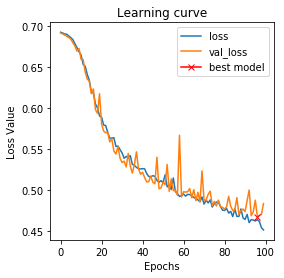

the minimum var_loss is 0.467813258767128
the Best epoch nr is 96
the maximum var_accuracy is 0.83
the maximum train_accuracy is 0.8
the Best epoch nr is 90


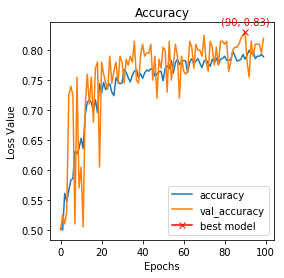

In [13]:
firstlayer =8
batchsize = 4
n_epochs = 100   # 20
learningrate = 0.00001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='binary_crossentropy',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
print('the maximum var_accuracy is', np.max(clf_hist.history["val_binary_accuracy"]))
print('the maximum train_accuracy is', np.max(clf_hist.history["binary_accuracy"]))
print('the Best epoch nr is', xmax)


Optimizer algorithm SGD

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3884 - binary_accuracy: 0.8430 - val_loss: 0.4744 - val_binary_accuracy: 0.8100
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3925 - binary_accuracy: 0.8380 - val_loss: 0.4717 - val_binary_accuracy: 0.8150
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3895 - binary_accuracy: 0.8340 - val_loss: 0.4855 - val_binary_accuracy: 0.8100
Epoch 4/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3902 - binary_accuracy: 0.8300 - val_loss: 0.4780 - val_binary_accuracy: 0.8250
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3898 - binary_accuracy: 0.8320 - val_loss: 0.4731 - val_binary_accuracy: 0.8250
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3901 - binary_accuracy: 0.8370 - val_loss: 0.4741 - val_binary_accu

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3850 - binary_accuracy: 0.8370 - val_loss: 0.5017 - val_binary_accuracy: 0.8000
Epoch 52/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3855 - binary_accuracy: 0.8430 - val_loss: 0.4723 - val_binary_accuracy: 0.8050
Epoch 53/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3840 - binary_accuracy: 0.8410 - val_loss: 0.4733 - val_binary_accuracy: 0.8150
Epoch 54/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3855 - binary_accuracy: 0.8380 - val_loss: 0.4717 - val_binary_accuracy: 0.8150
Epoch 55/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3857 - binary_accuracy: 0.8410 - val_loss: 0.4750 - val_binary_accuracy: 0.8150
Epoch 56/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.3830 - binary_accuracy: 0.8350 - val_loss: 0.4803 - val_binary_accuracy: 0.8250
Epoch 57/100
1000/1000 [=================

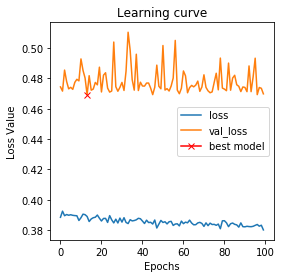

the minimum var_loss is 0.46924608692526815
the Best epoch nr is 13
the maximum var_accuracy is 0.83
the maximum train_accuracy is 0.848
the Best epoch nr is 30


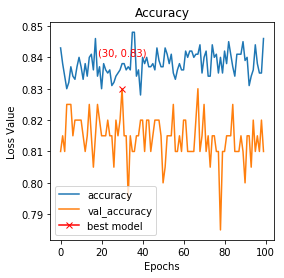

In [12]:
clf.compile(loss='binary_crossentropy',
              optimizer = SGD(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
print('the maximum var_accuracy is', np.max(clf_hist.history["val_binary_accuracy"]))
print('the maximum train_accuracy is', np.max(clf_hist.history["binary_accuracy"]))
print('the Best epoch nr is', xmax)

Optimizer algorithm RMSprop

In [10]:
from tensorflow.keras.optimizers import RMSprop

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4712 - binary_accuracy: 0.7850 - val_loss: 0.4937 - val_binary_accuracy: 0.8150
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4663 - binary_accuracy: 0.7930 - val_loss: 0.5045 - val_binary_accuracy: 0.7700
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4707 - binary_accuracy: 0.7850 - val_loss: 0.4961 - val_binary_accuracy: 0.8150
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4682 - binary_accuracy: 0.7930 - val_loss: 0.4840 - val_binary_accuracy: 0.8100
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4664 - binary_accuracy: 0.7900 - val_loss: 0.4871 - val_binary_accuracy: 0.7850
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4676 - binary_accuracy: 0.7810 - val_loss: 0.4808 - val_binary_accu

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4341 - binary_accuracy: 0.8070 - val_loss: 0.4757 - val_binary_accuracy: 0.8100
Epoch 52/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4336 - binary_accuracy: 0.8160 - val_loss: 0.4832 - val_binary_accuracy: 0.8150
Epoch 53/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4308 - binary_accuracy: 0.8190 - val_loss: 0.4794 - val_binary_accuracy: 0.8150
Epoch 54/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4285 - binary_accuracy: 0.8100 - val_loss: 0.4970 - val_binary_accuracy: 0.8050
Epoch 55/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4311 - binary_accuracy: 0.8130 - val_loss: 0.4768 - val_binary_accuracy: 0.8200
Epoch 56/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.4315 - binary_accuracy: 0.8050 - val_loss: 0.4772 - val_binary_accuracy: 0.8200
Epoch 57/100
1000/1000 [=================

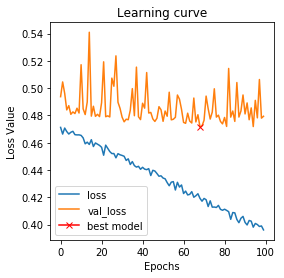

the minimum var_loss is 0.4716153532266617
the Best epoch nr is 68
the maximum var_accuracy is 0.825
the maximum train_accuracy is 0.836
the Best epoch nr is 63


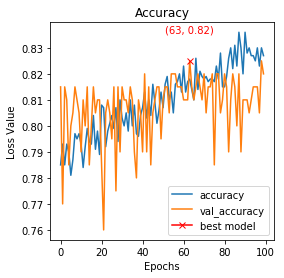

In [11]:
clf.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
print('the maximum var_accuracy is', np.max(clf_hist.history["val_binary_accuracy"]))
print('the maximum train_accuracy is', np.max(clf_hist.history["binary_accuracy"]))
print('the Best epoch nr is', xmax)

# TASK6F

Using hinge loss func with Adam optimizer

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_17 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)       

Epoch 33/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.8155 - binary_accuracy: 0.7240 - val_loss: 0.8074 - val_binary_accuracy: 0.7400
Epoch 34/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.8080 - binary_accuracy: 0.7370 - val_loss: 0.7893 - val_binary_accuracy: 0.7800
Epoch 35/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8058 - binary_accuracy: 0.7340 - val_loss: 0.7868 - val_binary_accuracy: 0.7850
Epoch 36/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.8036 - binary_accuracy: 0.7370 - val_loss: 0.7820 - val_binary_accuracy: 0.7750
Epoch 37/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.7997 - binary_accuracy: 0.7380 - val_loss: 0.7779 - val_binary_accuracy: 0.7750
Epoch 38/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.7947 - binary_accuracy: 0.7470 - val_loss: 0.7747 - val_binary_accuracy: 0.7850
Epoch 39/100
1000/1000 [====

1000/1000 [==============================] - 3s 3ms/sample - loss: 0.7460 - binary_accuracy: 0.7660 - val_loss: 0.7360 - val_binary_accuracy: 0.7800
Epoch 84/100
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7393 - binary_accuracy: 0.7770 - val_loss: 0.7296 - val_binary_accuracy: 0.7850
Epoch 85/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.7402 - binary_accuracy: 0.7750 - val_loss: 0.7233 - val_binary_accuracy: 0.7900
Epoch 86/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.7481 - binary_accuracy: 0.7610 - val_loss: 0.7232 - val_binary_accuracy: 0.7950
Epoch 87/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.7448 - binary_accuracy: 0.7710 - val_loss: 0.7240 - val_binary_accuracy: 0.7900
Epoch 88/100
1000/1000 [==============================] - 3s 3ms/sample - loss: 0.7390 - binary_accuracy: 0.7780 - val_loss: 0.7188 - val_binary_accuracy: 0.8000
Epoch 89/100
1000/1000 [=================

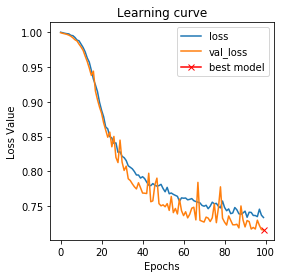

the minimum var_loss is 0.7158850556612015
the Best epoch nr is 99
the maximum var_accuracy is 0.805
the maximum train_accuracy is 0.788
the Best epoch nr is 73


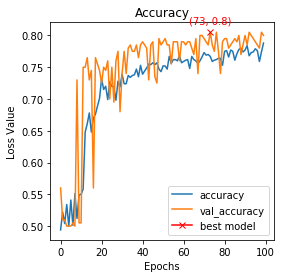

In [14]:
firstlayer =8
batchsize = 4
n_epochs = 100   # 20
learningrate = 0.00001   #0.00001

clf =  model(1,img_w, img_h,firstlayer)

clf.compile(loss='hinge',
              optimizer = Adam(lr = learningrate),
              metrics=['binary_accuracy'])
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data = (x_test,y_test))
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
     np.min(clf_hist.history["val_loss"]),
     marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.show()
print('the minimum var_loss is', np.min(clf_hist.history["val_loss"]))
print('the Best epoch nr is', np.argmin(clf_hist.history["val_loss"]))

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
ymax = np.max(clf_hist.history["val_binary_accuracy"])
plt.plot( xmax, ymax, marker="x", color="r", label="best model")
plt.annotate('(' + str(xmax) + ', '+ str(round(ymax,2)) + ')', xy = (xmax, ymax + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
print('the maximum var_accuracy is', np.max(clf_hist.history["val_binary_accuracy"]))
print('the maximum train_accuracy is', np.max(clf_hist.history["binary_accuracy"]))
print('the Best epoch nr is', xmax)
